In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
gold_data=pd.read_csv('gold_price_data.csv')

In [4]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
gold_data.shape

(2290, 6)

In [7]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
## getting the statistical information about data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [10]:
correlation= gold_data.corr()

<AxesSubplot:>

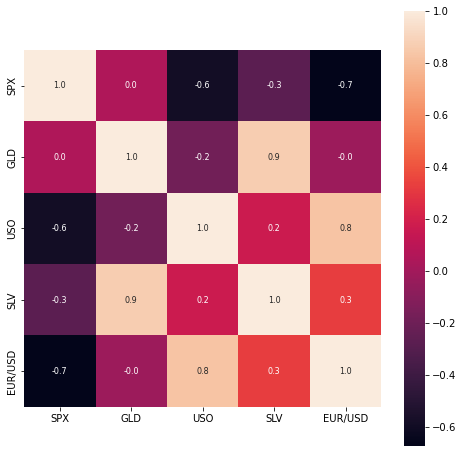

In [11]:
## constructing a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True,fmt='.1f',annot=True,annot_kws={'size':8})

In [12]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

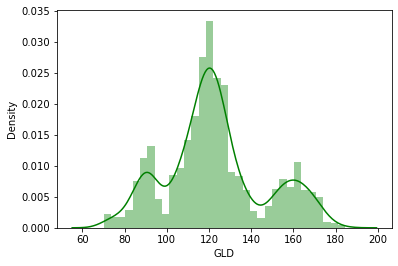

In [13]:
## checking the distribution of the GLD price
sns.distplot(gold_data['GLD'],color='green')

In [15]:
X = gold_data.drop(['Date','GLD'],axis=1)
y=gold_data['GLD']


In [19]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


Splitting into Training and Testing Data

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size =.2,random_state=2)

Model Training :Random Forest Regressor

In [23]:
regressor= RandomForestRegressor(n_estimators=100)

In [27]:
## Training the model
regressor.fit(X_train,y_train)

RandomForestRegressor()

Model Evaluation

In [30]:
## prediction on Test Data
test_data_prediction= regressor.predict(X_test)

In [31]:
test_data_prediction

array([168.61599918,  82.09619998, 116.51950019, 127.56090066,
       120.76700107, 154.83959757, 150.57249844, 126.12010013,
       117.55009883, 125.96680067, 116.76140114, 171.83470076,
       142.30139906, 167.78889859, 115.16940013, 117.64020019,
       137.0962039 , 170.10020069, 159.27870294, 162.42749946,
       155.13970024, 124.9168004 , 176.91059977, 156.76930347,
       125.23460033,  93.95719967,  77.57890017, 120.7604    ,
       119.16619994, 167.55139967,  88.15480064, 125.45989974,
        91.02650071, 117.79800004, 121.0615988 , 136.23790103,
       115.40070115, 114.94120088, 147.78729963, 106.97580087,
       104.1512027 ,  87.20079789, 126.52190087, 117.95779987,
       151.779599  , 119.61159992, 108.33850011, 107.83229813,
        93.19520037, 127.10879799,  74.71740019, 113.65249945,
       121.4051002 , 111.40229904, 118.80009892, 120.96869957,
       159.25579951, 167.52520183, 146.91319653,  85.92679882,
        94.39790009,  86.85599861,  90.54049981, 118.97

In [35]:
## R squared error
error_score=metrics.r2_score(y_test,test_data_prediction)
print('R squared error :',error_score)

R squared error : 0.9892904796251859


Compare the Actual Values and Predicted VAlues in a plot

In [38]:
y_test=list(y_test)

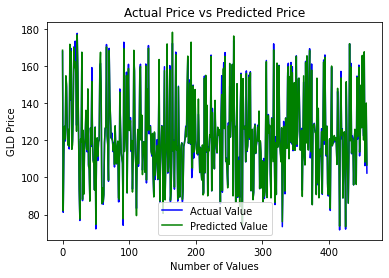

In [44]:
plt.plot(y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()